In [88]:
import pandas as pd 
import numpy as np 
from scipy.signal import butter, filtfilt, iirnotch
import scipy.signal as signal
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [172]:
test_file= '../signal-processing/openbci-data/raw/10-100MVC-t1-5/100-5.csv'

df = pd.read_table(test_file, header=None)

In [173]:
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,60.0,-5223.088589,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669682e+09,0.0
1,61.0,-5009.472967,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669682e+09,0.0
2,62.0,-4981.242714,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669682e+09,0.0
3,63.0,-5804.166890,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669682e+09,0.0
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088,...,192.0,247.0,0.0,30.0,144.0,0.0,0.0,0.0,1.669682e+09,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5722,86.0,-8736.000506,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669682e+09,0.0
5723,87.0,-8762.755545,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669682e+09,0.0
5724,88.0,-8756.787629,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669682e+09,0.0
5725,89.0,-8710.184242,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,-187500.022352,0.092,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.669682e+09,0.0


In [174]:
data = df[1][2500:4000]

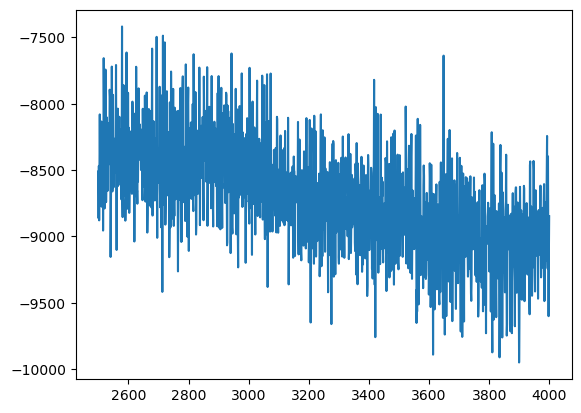

In [175]:
plt.plot(data)

In [176]:
data_minus = [i+187500.022352 for i in data]

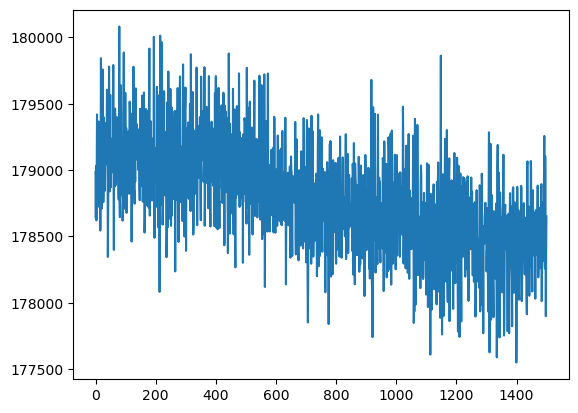

In [177]:
plt.plot(data_minus)

## Filtering

- DC offset filtering: https://stackoverflow.com/questions/20948111/how-can-i-remove-a-wandering-dc-offset-from-an-audio-clip


In [178]:
def filter_data(data, fs=250, notch_f0 = 60, Q = 100):
  nyq = 0.5*fs
  order = 4

  y = [i+187500.022352 for i in data] ## minus constant dc drift
  
  # remove dc offset 
  b,a = butter(2, 1/nyq, 'highpass')
  y = filtfilt(b,a,data)

  # bandpass_filter=[1,120] --> need to define the last digit as below 125 (250/2)
  # bandpass_filter = [i for i in bandpass_filter]
  # b, a = butter(order, bandpass_filter, fs=fs, btype = 'bandpass')
  # y = filtfilt(b, a, data)


  b_notch, a_notch = iirnotch(notch_f0, Q, fs)
  y = filtfilt(b_notch, a_notch, y)

  return y

In [179]:
y = filter_data(data_minus, Q=100)

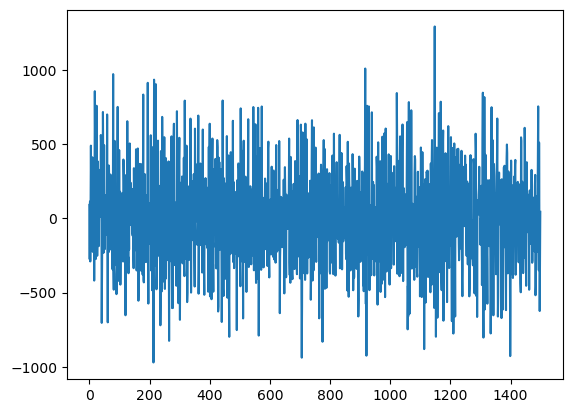

In [180]:
plt.plot(y)

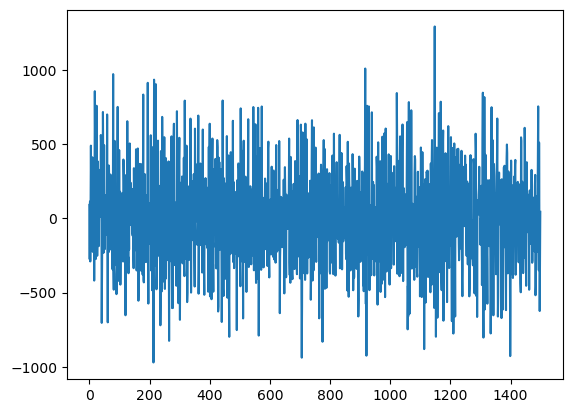

In [181]:
plt.plot(y)

In [153]:
# rectify EMG signal
absSignal = np.absolute(y)
timeAbs=np.linspace(0, len(absSignal)/250, num=len(absSignal))

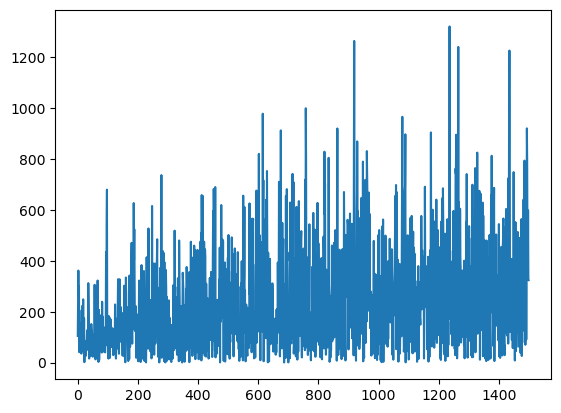

In [154]:
plt.plot(absSignal)

In [54]:
from src.analyze.emg_processing import analyzeEMG
# result_dict = analyzeEMG(y, 250, False)
# result_dict

In [182]:
result_dict = analyzeEMG(y, 250, False)
result_dict

/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF


{'TimeDomain': {'IEMG': 375759.89080384455,
  'MAV': 250.5065938692297,
  'MAV1': 185.99891052473023,
  'MAV2': 119.88473754560405,
  'SSI': 152294681.05484962,
  'VAR': 101597.51904926592,
  'TM3': 4251175.475136781,
  'TM4': 32819965077.62493,
  'TM5': 4532216569191.851,
  'LOG': 6.217723393675252e+108,
  'RMS': 318.63739166943316,
  'WL': 490883.3576881188,
  'AAC': 327.2555717920792,
  'DASDV': 174511.70398810782,
  'AFB': 0.005216197749856079,
  'ZC': 664,
  'MYOP': 1.0,
  'WAMP': 766,
  'SSC': 421},
 'FrequencyDomain': {'MNF': 57.43601101524063,
  'MDF': 53.7109375,
  'PeakFrequency': 42.96875,
  'MNP': 1186.0005136303187,
  'TTP': 152994.0662583111,
  'SM1': 8787368.87487881,
  'SM2': 14964804724.44019,
  'SM3': 32535254259468.598,
  'FR': inf,
  'PSR': 0.5308679809097229,
  'VCF': 94514.07928810541}}

In [156]:
df_td = pd.DataFrame(result_dict['TimeDomain'], index=[0])
df_td

,IEMG,MAV,MAV1,MAV2,SSI,VAR,TM3,TM4,TM5,LOG,RMS,WL,AAC,DASDV,AFB,ZC,MYOP,WAMP,SSC
0,360825.939757,240.550627,184.353052,112.736055,1.471704e+08,98179.035431,5.080729e+06,3.616392e+10,7.519196e+12,2.949916e+104,313.230878,455449.251662,303.632834,160732.904466,-0.00119,637,1.0,748,411


In [157]:
df_fd = pd.DataFrame(result_dict['FrequencyDomain'], index=[0])
df_fd

,MNF,MDF,PeakFrequency,MNP,TTP,SM1,SM2,SM3,FR,PSR,VCF
0,55.796258,52.734375,44.921875,1104.49141,142479.391907,7.949817e+06,1.285355e+10,2.773705e+13,inf,0.575015,87100.194493


## Get DataFrame results for all files

In [188]:
import os 

data_dir = './openbci-data/raw/10-100MVC-t1-5/'

In [189]:
save_dir = './openbci-data/results/'
save_tdfile = 'td_1-5.csv'
save_fdfile = 'fd_1-5.csv'

In [190]:
def filter_data(data, fs=250, notch_f0 = 60, Q = 100):
  nyq = 0.5*fs
  order = 4

  y = [i+187500.022352 for i in data] ## minus constant dc drift
  
  # remove dc offset 
  b,a = butter(2, 1/nyq, 'highpass')
  y = filtfilt(b,a,data)

  # bandpass_filter=[1,120] --> need to define the last digit as below 125 (250/2)
  # bandpass_filter = [i for i in bandpass_filter]
  # b, a = butter(order, bandpass_filter, fs=fs, btype = 'bandpass')
  # y = filtfilt(b, a, data)

  b_notch, a_notch = iirnotch(notch_f0, Q, fs)
  y = filtfilt(b_notch, a_notch, y)

  return y

In [191]:
import os 
for subdir, dirs, files in os.walk(data_dir):
    counter = 0
    for file in files: 
        if os.path.join(subdir, file).endswith('csv'): 
            df = pd.read_table(subdir+file, header=None)
            data = df[1][2500:4000]
            y = filter_data(data)
            plt.plot(y)
            # y = data.tolist()
            result_dict = analyzeEMG(y, 250, False)
            df_td = pd.DataFrame(result_dict['TimeDomain'], index=[0])
            df_fd = pd.DataFrame(result_dict['FrequencyDomain'], index=[0])
            df_td['File'] = file[:-4]
            df_fd['File'] = file[:-4]
            plt.plot(y)
            plt.savefig('./openbci-data/pics/'+file[:-3])
            plt.close()
            if counter == 0: 
                df_td.to_csv((save_dir+save_tdfile), index=False, mode='a');
                df_fd.to_csv((save_dir+save_fdfile), index=False, mode='a');
            else: 
                df_td.to_csv((save_dir+save_tdfile), index=False, header=False, mode='a');
                df_fd.to_csv((save_dir+save_fdfile), index=False, header=False, mode='a');
        counter += 1

/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF
/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF
/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF
/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF
/Users/jessysong/Documents/Github-Projects/CTS-early-detection/signal-processing/src/analyze/freq_descriptors.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  FR = LF / HF
/Users/jessysong/Documents/Git

## Read full processed results

In [192]:
df_tdres = pd.read_csv('./openbci-data/results/td_1-5.csv')
df_tdres.sort_values('File')

,IEMG,MAV,MAV1,MAV2,SSI,VAR,TM3,TM4,TM5,LOG,RMS,WL,AAC,DASDV,AFB,ZC,MYOP,WAMP,SSC,File
25,8197.580680,7.770219,5.436481,2.804478,1.130673e+05,107.274442,1.059083e+03,6.218923e+04,1.829204e+06,2.368989e+03,10.352428,7075.494054,6.706629,78.348629,-0.096472,320,1.000000,568,245,000-1
9,99991.497456,66.660998,48.841997,32.258079,1.142561e+07,7622.157694,3.226891e+03,2.129148e+08,5.140577e+09,8.922853e+28,87.275863,120578.260701,80.385507,10932.545136,0.072499,615,1.000000,707,387,010-1
7,94719.843193,63.146562,45.830412,29.059885,1.037810e+07,6923.346696,2.223497e+04,1.820981e+08,4.556326e+09,2.655850e+27,83.178910,104161.797577,69.441198,8635.371755,0.187063,580,1.000000,744,371,010-2
8,99628.324329,66.418883,49.590075,32.332677,1.100361e+07,7340.633533,1.077974e+05,2.254853e+08,7.410104e+09,7.004132e+28,85.648933,119028.601922,79.352401,10590.804629,0.027512,610,1.000000,739,411,010-3
5,87330.727995,58.220485,42.257289,25.574679,8.904319e+06,5940.172865,2.629099e+05,1.864644e+08,2.770768e+10,1.926795e+25,77.046822,93274.871497,62.183248,6564.369812,0.027369,545,1.000000,729,405,010-4
6,107426.687078,71.617791,51.148252,28.888404,1.524119e+07,10167.572314,1.734181e+06,1.229804e+09,7.005879e+11,1.268270e+31,100.800764,114966.669500,76.644446,9550.231117,-0.003969,591,1.000000,709,375,010-5
19,111704.428168,74.469619,55.559322,35.620759,1.416026e+07,9446.467873,2.408699e+05,3.688387e+08,2.753356e+10,2.196567e+32,97.160538,138024.255898,92.016171,14527.079533,-0.009787,629,0.999333,710,378,020-1
17,78485.958355,55.194064,42.421559,34.535962,7.597303e+06,5346.448033,1.369419e+05,1.113305e+08,6.451406e+09,9.342804e+23,73.093695,95170.747206,66.927389,8559.267008,0.130780,540,1.000000,662,378,020-2
16,112825.395142,75.216930,53.789602,32.188813,1.521687e+07,10151.347767,7.217444e+05,5.791547e+08,1.683996e+11,4.637647e+32,100.720307,136238.799632,90.825866,13700.035545,0.109484,603,1.000000,711,389,020-3
23,109616.016088,73.077344,54.266362,35.950332,1.318798e+07,8797.852756,1.668182e+05,2.715510e+08,2.220122e+10,5.458675e+31,93.765599,134239.273880,89.492849,13465.875321,-0.002706,615,0.999333,705,373,020-4


In [193]:
df_fdres = pd.read_csv('./openbci-data/results/fd_1-5.csv')
df_fdres.sort_values('File')

,MNF,MDF,PeakFrequency,MNP,TTP,SM1,SM2,SM3,FR,PSR,VCF,File
25,35.419337,37.109375,59.570312,0.858795,110.784521,3.923914e+03,6.762738e+03,1.903804e+04,inf,0.489324,-1193.485357,000-1
9,52.004963,52.734375,43.945312,79.840647,10299.443520,5.356222e+05,5.990919e+07,8.314647e+09,inf,0.542360,3112.224633,010-1
7,51.560445,53.710938,37.109375,69.405563,8953.317620,4.616370e+05,4.903509e+07,6.971392e+09,inf,0.487473,2818.270978,010-2
8,54.223298,54.687500,55.664062,75.592542,9751.437895,5.287551e+05,6.266516e+07,9.540670e+09,inf,0.582969,3486.081835,010-3
5,40.763276,42.968750,1.953125,64.927932,8375.703269,3.414211e+05,3.779377e+07,8.295958e+09,inf,0.390147,2850.665961,010-4
6,52.541726,51.757812,48.828125,68.481611,8834.127827,4.641603e+05,5.133233e+07,7.700165e+09,inf,0.605816,3050.051319,010-5
19,51.946687,50.781250,43.945312,103.247527,13318.930919,6.918743e+05,1.027706e+08,1.937319e+10,inf,0.534028,5017.669074,020-1
17,53.084195,54.687500,39.062500,61.421585,7923.384422,4.206065e+05,3.628682e+07,3.987270e+09,inf,0.505420,1761.780049,020-2
16,53.350836,52.734375,52.734375,95.273232,12290.246890,6.556950e+05,9.306021e+07,1.743965e+10,inf,0.587673,4725.562952,020-3
23,53.561717,52.734375,40.039062,95.730873,12349.282567,6.614488e+05,9.459662e+07,1.752051e+10,inf,0.562014,4791.232545,020-4
